In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
df = pd.read_csv('../data/processed/all.csv')

In [64]:
df.count()

productId    19259
rating       19259
review       19211
date         19259
language     19259
sentiment    19259
label        19259
dtype: int64

In [65]:
# Create count table
sentiment_counts_df = df.groupby('sentiment').size()
sentiment_counts_df.head()

sentiment
negative    6241
neutral     3110
positive    9908
dtype: int64

In [69]:
# Create count table
lang_sentiment_counts_df = df.groupby(['language', 'sentiment']).size().unstack(fill_value=0)
lang_sentiment_counts_df.head()

sentiment,negative,neutral,positive
language,,,
english,3917,2027,5013
nepali,938,663,1449
romanized_nepali,1386,420,3446


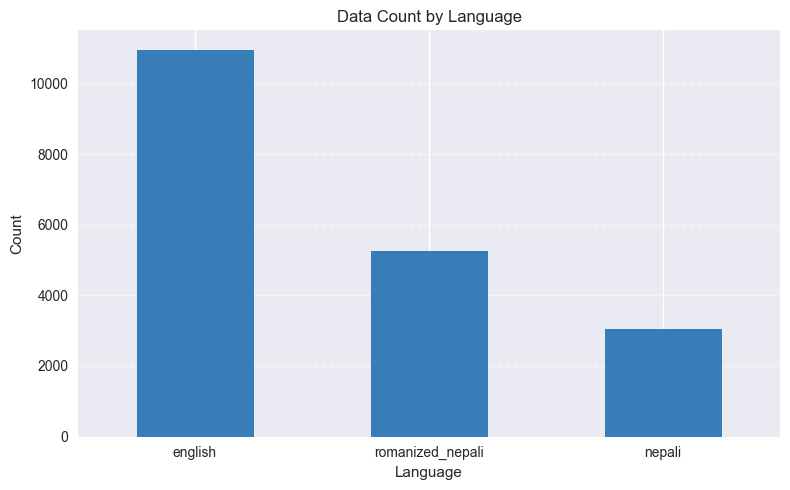

In [67]:
#languages = ['English', 'Nepali', 'Romanized Nepali']
#colors = ['#2ecc71', '#f39c12', '#e74c3c']  # green, orange, red

# Count samples per language
lang_counts = df['language'].value_counts()

# Plot bar graph
plt.figure(figsize=(8, 5))
lang_counts.plot(kind='bar', color='#377eb8')
plt.title('Data Count by Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

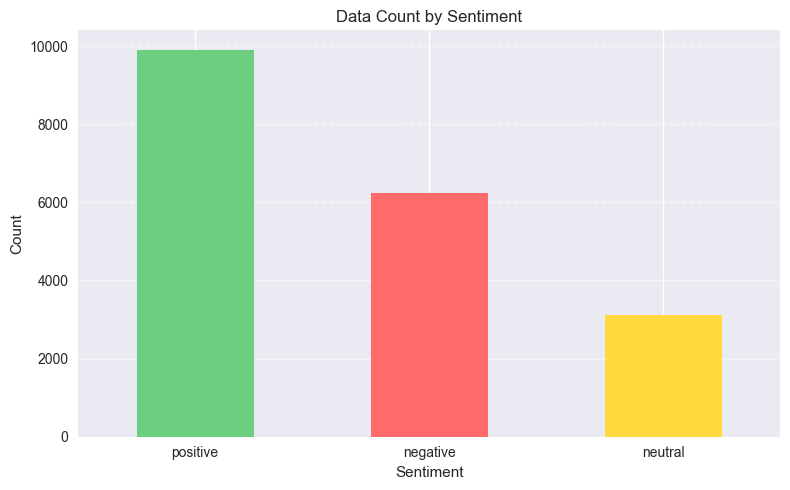

In [68]:
# Count samples per language
lang_counts = df['sentiment'].value_counts()

colors = ['#6BCF7F', '#FF6B6B', '#FFD93D']

# Plot bar graph
plt.figure(figsize=(8, 5))
lang_counts.plot(kind='bar', color=colors)
plt.title('Data Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

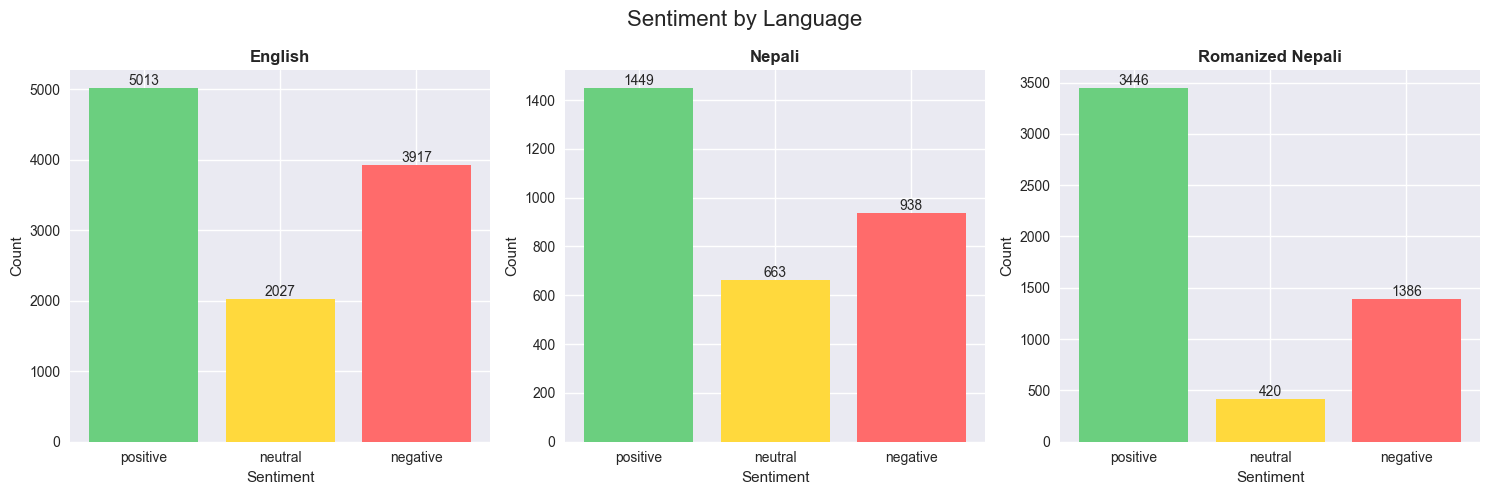

In [71]:
def plotLangSentiBarCharts(counts_df):
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Sentiment by Language', fontsize=16)
    
    # Mapping of language codes to display titles
    language_titles = {
        'english': 'English',
        'nepali': 'Nepali',
        'romanized_nepali': 'Romanized Nepali'
    }
    
    # Color map by sentiment label with fixed order
    #color_map = {
    #    'positive': '#2ecc71',  # green
    #    'neutral':  '#f39c12',  # orange
    #    'negative': '#e74c3c'   # red
    #}
    
    color_map = {
        'positive': '#6BCF7F',  # green
        'neutral':  '#FFD93D',  # orange
        'negative': '#FF6B6B'   # red
    }
    
    #colors = ['#FF6B6B', '#FFD93D', '#6BCF7F']
    
    sentiment_order = list(color_map.keys())  # ['positive', 'neutral', 'negative']
    
    for i, (lang_code, lang_name) in enumerate(language_titles.items()):
        lang_data = counts_df.loc[lang_code]
    
        # Prepare counts in fixed order, fill 0 if missing
        counts = [lang_data.get(sentiment, 0) for sentiment in sentiment_order]
        colors = [color_map[sentiment] for sentiment in sentiment_order]
    
        # Create bar chart with ordered sentiments and colors
        bars = axes[i].bar(sentiment_order, counts, color=colors)
        axes[i].set_title(lang_name, fontweight='bold')
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('Sentiment')
    
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                         f'{int(height)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


plotLangSentiBarCharts(lang_sentiment_counts_df)

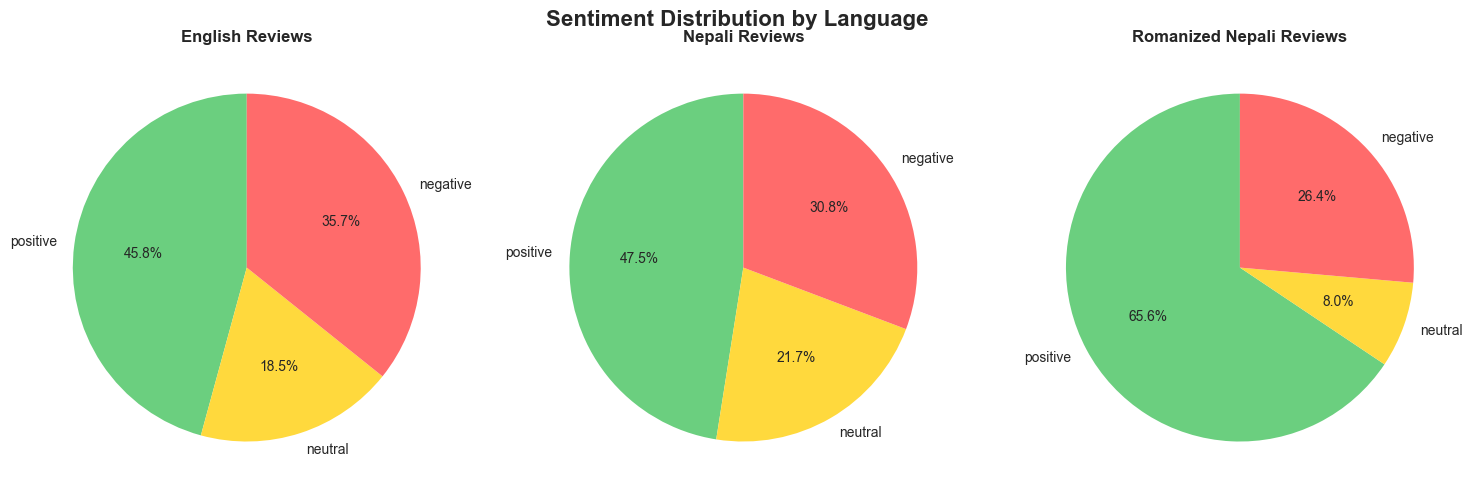

In [94]:
def plotLangSentiPieCharts(counts_df):
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Sentiment by Language', fontsize=16)
    
    # Mapping of language codes to display titles
    language_titles = {
        'english': 'English',
        'nepali': 'Nepali',
        'romanized_nepali': 'Romanized Nepali'
    }
    
    color_map = {
        'positive': '#6BCF7F',  # green
        'neutral':  '#FFD93D',  # orange
        'negative': '#FF6B6B'   # red
    }
    
    #colors = ['#FF6B6B', '#FFD93D', '#6BCF7F']
    
    sentiment_order = list(color_map.keys())  # ['positive', 'neutral', 'negative']
    
    for i, (lang_code, lang_name) in enumerate(language_titles.items()):
        lang_data = counts_df.loc[lang_code]
    
        # Prepare counts in fixed order, fill 0 if missing
        counts = [lang_data.get(sentiment, 0) for sentiment in sentiment_order]
        colors = [color_map[sentiment] for sentiment in sentiment_order]

        # Create pie chart for each language
        axes[i].pie(
            counts,
            labels=sentiment_order,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors[:len(counts_df)]  # Match number of segments
        )
        
        axes[i].set_title(f'{lang_name} Reviews', fontweight='bold')
        
    plt.suptitle('Sentiment Distribution by Language', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


plotLangSentiPieCharts(lang_sentiment_counts_df)

In [56]:
eng_df = df[df['language']=='english']

eng_df

,productId,rating,review,date,language,sentiment,label
0,131282795,2,it's not value for money.,21 Aug 2024,english,negative,0
2,103097807,5,not fine,28 Feb 2025,english,negative,0
3,116666743,5,"so far, so good",29 Sep 2023,english,positive,2
4,110487640,4,must have when you have go pro,08 Oct 2023,english,positive,2
5,146677560,5,it is good quality. love this item,10 Sep 2024,english,positive,2
...,...,...,...,...,...,...,...
19252,129559727,5,Biggest scammers.,17 Dec 2024,english,negative,0
19253,128017756,5,Nice!!,16 Mar 2025,english,positive,2
19254,130145002,5,good service tq so much,23 Sep 2024,english,positive,2
19255,106039929,4,it's alright was a bit short for my doorframe ...,12 Feb 2025,english,neutral,1


In [53]:
nep_df = df[df['language']=='nepali']


nep_df


,productId,rating,review,date,language,sentiment,label
1,104928356,4,हेरुम कत्तिको टिक्छ।,17 Apr 2025,nepali,neutral,1
6,106100440,5,त्यति उज्यालो छैन तर ठीक छ।,06 Jun 2022,nepali,neutral,1
8,103237188,1,मूल्य अनुसर झोला akdam ठीक xa तर अली सानो xa,07 Jan 2024,nepali,negative,0
13,127994389,1,तस्वीरमा देखाइएको उत्पादन पक्कै होइन,20 Jul 2024,nepali,negative,0
18,129189243,5,म लगाउँदा कति सुन्दर देखिन्छु र आँखालाई पनि आक...,23 Apr 2024,nepali,positive,2
...,...,...,...,...,...,...,...
19227,121248865,5,युज चाई गरेको छैन बिटी फोटो मा जस्तै आको छ समान,24 Apr 2025,nepali,positive,2
19229,129553683,3,"क्यामेरा, डिस्प्ले र कार्यसम्पादन उत्कृष्ट छ, ...",13 Feb 2025,nepali,negative,0
19235,130058177,1,कलर उद्ये को थियो हवा रैछ,14 Jun 2024,nepali,negative,0
19236,105092839,5,"धन्यवाद! प्याकेज राम्रो छ तर गुणस्तर मध्यम छ, ...",22 Oct 2024,nepali,neutral,1


In [54]:
rom_nep_df = df[df['language']=='romanized_nepali']

rom_nep_df

,productId,rating,review,date,language,sentiment,label
9,127058254,5,Quality ekdam ramro raixa .... Seller le gift ...,07 Apr 2024,romanized_nepali,positive,2
10,129101397,5,mero ios ma ramro sanga chalyo ramro lagyo mal...,26 Feb 2024,romanized_nepali,positive,2
14,105996152,5,Dammi xa hai lida hunxa,14 Jun 2024,romanized_nepali,positive,2
17,119039227,1,colour nai farak pathaune raixaa,13 Aug 2023,romanized_nepali,negative,0
25,108837856,4,it’s good,22 Jan 2025,romanized_nepali,positive,2
...,...,...,...,...,...,...,...
19245,130052095,4,color vane ko thiye blue ayo pink but ramro xa,22 Oct 2024,romanized_nepali,positive,2
19249,130056840,5,photo ma dekhko jaste xa tra saano aauxa,31 Mar 2025,romanized_nepali,positive,2
19250,106395486,5,गज्जब को product गज्जब को माल,30 Apr 2024,romanized_nepali,positive,2
19256,119110853,5,Thankyou phone ekdamai ramro xa,15 Jan 2025,romanized_nepali,positive,2


In [93]:
df.head(10)

,productId,rating,review,date,language,sentiment,label
0,131282795,2,it's not value for money.,21 Aug 2024,english,negative,0
1,104928356,4,हेरुम कत्तिको टिक्छ।,17 Apr 2025,nepali,neutral,1
2,103097807,5,not fine,28 Feb 2025,english,negative,0
3,116666743,5,"so far, so good",29 Sep 2023,english,positive,2
4,110487640,4,must have when you have go pro,08 Oct 2023,english,positive,2
5,146677560,5,it is good quality. love this item,10 Sep 2024,english,positive,2
6,106100440,5,त्यति उज्यालो छैन तर ठीक छ।,06 Jun 2022,nepali,neutral,1
7,104086449,5,sab dark ra black matea xa ta double double! w...,14 Sep 2020,english,negative,0
8,103237188,1,मूल्य अनुसर झोला akdam ठीक xa तर अली सानो xa,07 Jan 2024,nepali,negative,0
9,127058254,5,Quality ekdam ramro raixa .... Seller le gift ...,07 Apr 2024,romanized_nepali,positive,2


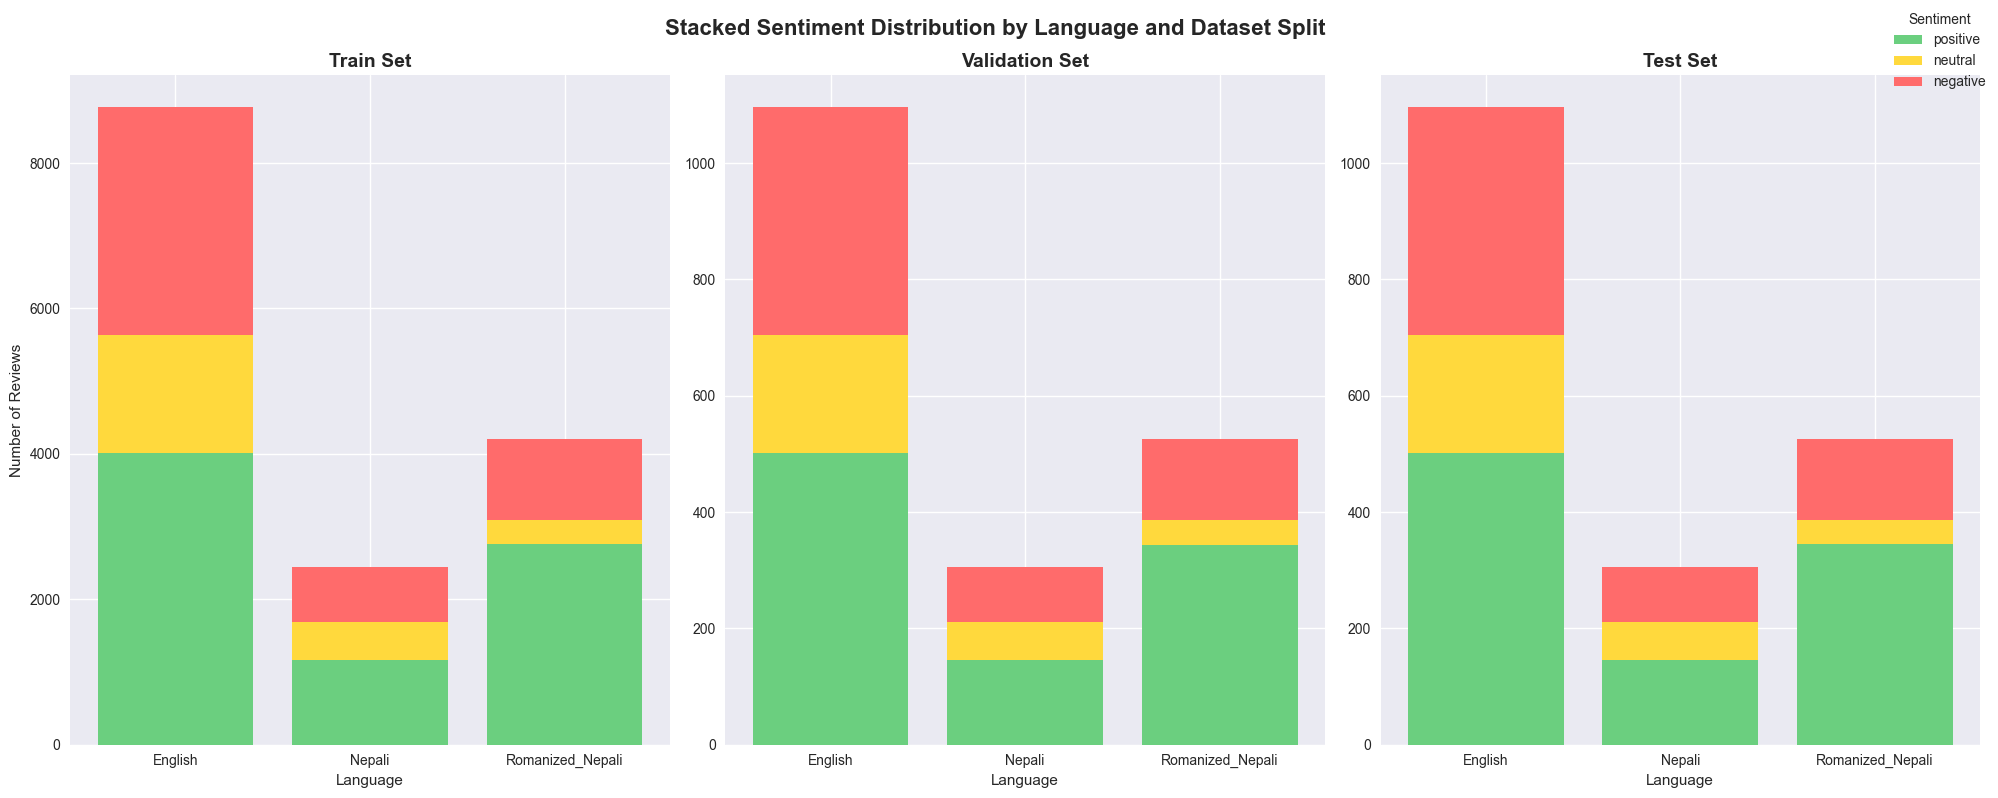

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample split DataFrames: df_train, df_val, df_test
# Make sure they have 'language' and 'sentiment' columns

train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')
test_df = pd.read_csv('../data/processed/test.csv')

# Define sentiment color map
color_map = {
        'positive': '#6BCF7F',  # green
        'neutral':  '#FFD93D',  # orange
        'negative': '#FF6B6B'   # red
    }

sentiment_order = list(color_map.keys())
language_titles = {'en': 'English', 'ne': 'Nepali', 'rom': 'Romanized Nepali'}

# Function to compute stacked bar counts
def get_lang_sentiment_df(df):
    return df.groupby(['language', 'sentiment']).size().unstack(fill_value=0).reindex(columns=sentiment_order)

# Prepare dataframes
train_counts = get_lang_sentiment_df(train_df)
val_counts   = get_lang_sentiment_df(val_df)
test_counts  = get_lang_sentiment_df(test_df)

# List for plotting
datasets = [('Train', train_counts), ('Validation', val_counts), ('Test', test_counts)]

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
for ax, (title, data) in zip(axes, datasets):
    bottom = [0] * len(data)
    x_labels = [language_titles.get(lang, lang.title()) for lang in data.index]
    
    for sentiment in sentiment_order:
        values = data[sentiment]
        ax.bar(x_labels, values, bottom=bottom, color=color_map[sentiment], label=sentiment.title())
        bottom = [i + j for i, j in zip(bottom, values)]

    ax.set_title(f'{title} Set', fontsize=14, fontweight='bold')
    ax.set_xlabel('Language')
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=0)

axes[0].set_ylabel('Number of Reviews')
fig.suptitle('Stacked Sentiment Distribution by Language and Dataset Split', fontsize=16, fontweight='bold')
fig.legend(sentiment_order, title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()

